In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score

# importing the churn_clean.csv through the file path
df = pd.read_csv('/Users/justinhuynh/Desktop/churn_clean.csv')
# check all information about this file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [24]:
# select variables that are relevant only to our analysis
relevant_columns = ['Churn', 'Age', 'Income', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Gender', 'Marital', 'Techie', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']
df = df[relevant_columns]

In [25]:
# check for and handle missing values
df.isnull().sum()

Churn                   0
Age                     0
Income                  0
Bandwidth_GB_Year       0
Outage_sec_perweek      0
Contacts                0
Yearly_equip_failure    0
Gender                  0
Marital                 0
Techie                  0
Contract                0
InternetService         0
PaperlessBilling        0
PaymentMethod           0
dtype: int64

In [26]:
# convert 'Churn' to binary values (Yes -> 1, No -> 0)
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# check unique values in the 'Churn' column to confirm conversion
print(df['Churn'].unique())

[0 1]


In [27]:
# convert relevant categorical variables to numerical using one-hot encoding
categorical_vars = ['Gender', 'Marital', 'Techie', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [28]:
# verify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Bandwidth_GB_Year     10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Contacts              10000 non-null  int64  
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Gender                10000 non-null  object 
 8   Marital               10000 non-null  object 
 9   Techie                10000 non-null  object 
 10  Contract              10000 non-null  object 
 11  InternetService       10000 non-null  object 
 12  PaperlessBilling      10000 non-null  object 
 13  PaymentMethod         10000 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.1+ MB


In [29]:
# remove duplicate rows if any
df = df.drop_duplicates()

In [30]:
# display the cleaned data
df.head()

,Churn,Age,Income,Bandwidth_GB_Year,Outage_sec_perweek,Contacts,Yearly_equip_failure,Gender,Marital,Techie,Contract,InternetService,PaperlessBilling,PaymentMethod
0,0,68,28561.99,904.536110,7.978323,0,1,Male,Widowed,No,One year,Fiber Optic,Yes,Credit Card (automatic)
1,1,27,21704.77,800.982766,11.699080,0,1,Female,Married,Yes,Month-to-month,Fiber Optic,Yes,Bank Transfer(automatic)
2,0,50,9609.57,2054.706961,10.752800,0,1,Female,Widowed,Yes,Two Year,DSL,Yes,Credit Card (automatic)
3,0,48,18925.23,2164.579412,14.913540,2,0,Male,Married,Yes,Two Year,DSL,Yes,Mailed Check
4,1,83,40074.19,271.493436,8.147417,2,1,Male,Separated,No,Month-to-month,Fiber Optic,No,Mailed Check


In [36]:
# summary statistics for independent continuous variables
# Churn is included here since it has been converted to binary for logistic regression
continuous_summary_stats = df[['Churn', 'Age', 'Income', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']].describe()
print(continuous_summary_stats)

              Churn           Age         Income  Bandwidth_GB_Year  \
count  10000.000000  10000.000000   10000.000000       10000.000000   
mean       0.265000     53.078400   39806.926771        3392.341550   
std        0.441355     20.698882   28199.916702        2185.294852   
min        0.000000     18.000000     348.670000         155.506715   
25%        0.000000     35.000000   19224.717500        1236.470827   
50%        0.000000     53.000000   33170.605000        3279.536903   
75%        1.000000     71.000000   53246.170000        5586.141370   
max        1.000000     89.000000  258900.700000        7158.981530   

       Outage_sec_perweek      Contacts  Yearly_equip_failure  
count        10000.000000  10000.000000          10000.000000  
mean            10.001848      0.994200              0.398000  
std              2.976019      0.988466              0.635953  
min              0.099747      0.000000              0.000000  
25%              8.018214      0.000000 

In [35]:
# summary statistics for dependent variable and categorical variables
categorical_summary_stats = df[['Gender', 'Marital', 'Techie', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']].describe()
print(categorical_summary_stats)

        Gender   Marital Techie        Contract InternetService  \
count    10000     10000  10000           10000           10000   
unique       3         5      2               3               3   
top     Female  Divorced     No  Month-to-month     Fiber Optic   
freq      5025      2092   8321            5456            4408   

       PaperlessBilling     PaymentMethod  
count             10000             10000  
unique                2                 4  
top                 Yes  Electronic Check  
freq               5882              3398  


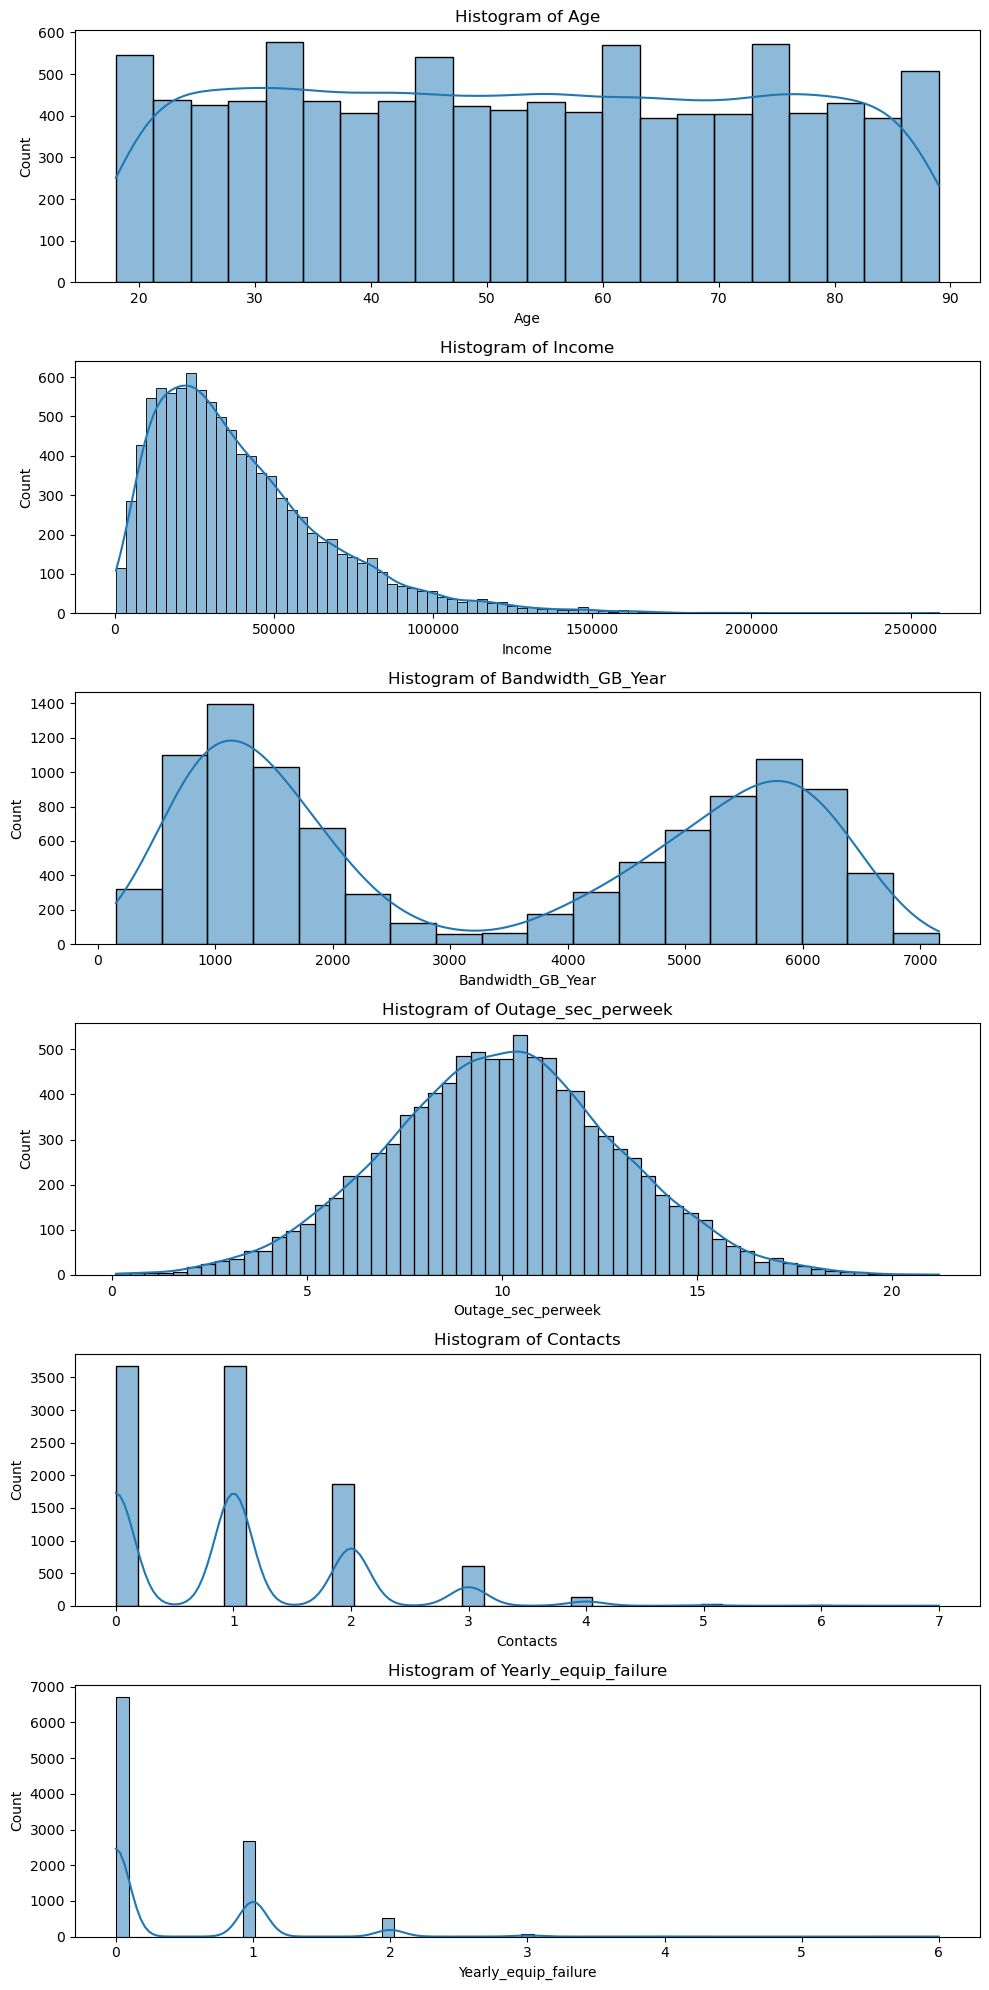

In [13]:
# univariate visualizations - histogram for continuous variables 
continuous_vars = ['Age', 'Income', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']

fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(10, 20))
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

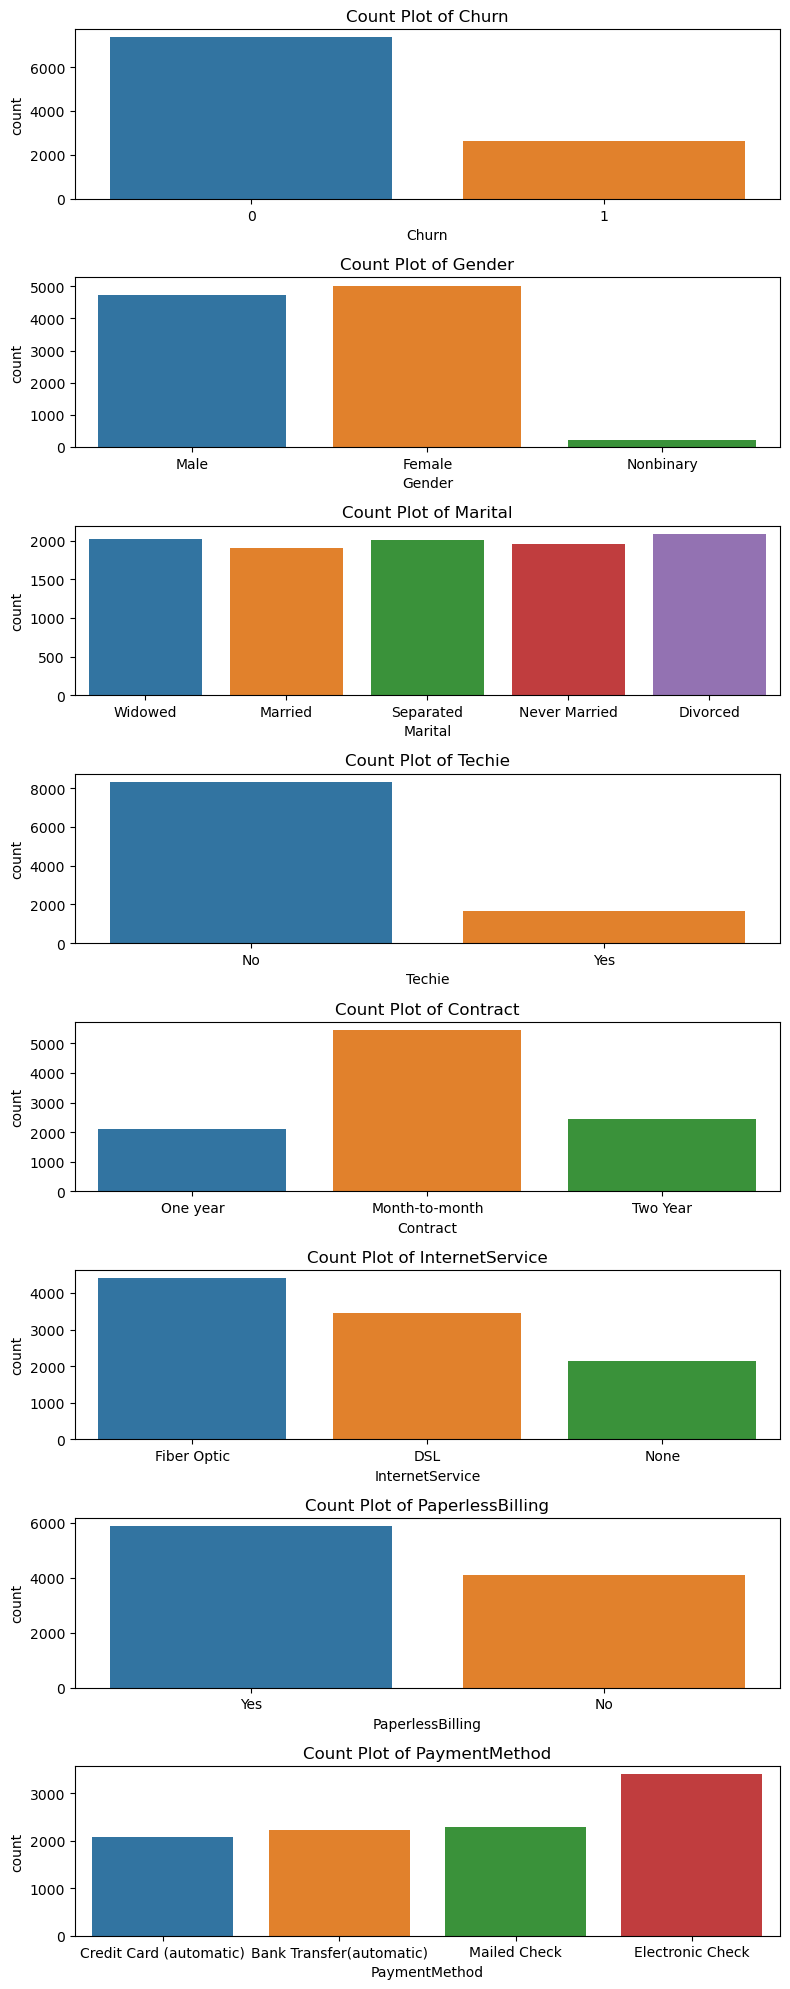

In [14]:
# univariate visualizations - bar chart for categorical variables 
categorical_vars = ['Churn', 'Gender', 'Marital', 'Techie', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, 20))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Count Plot of {var}')
plt.tight_layout()
plt.show()

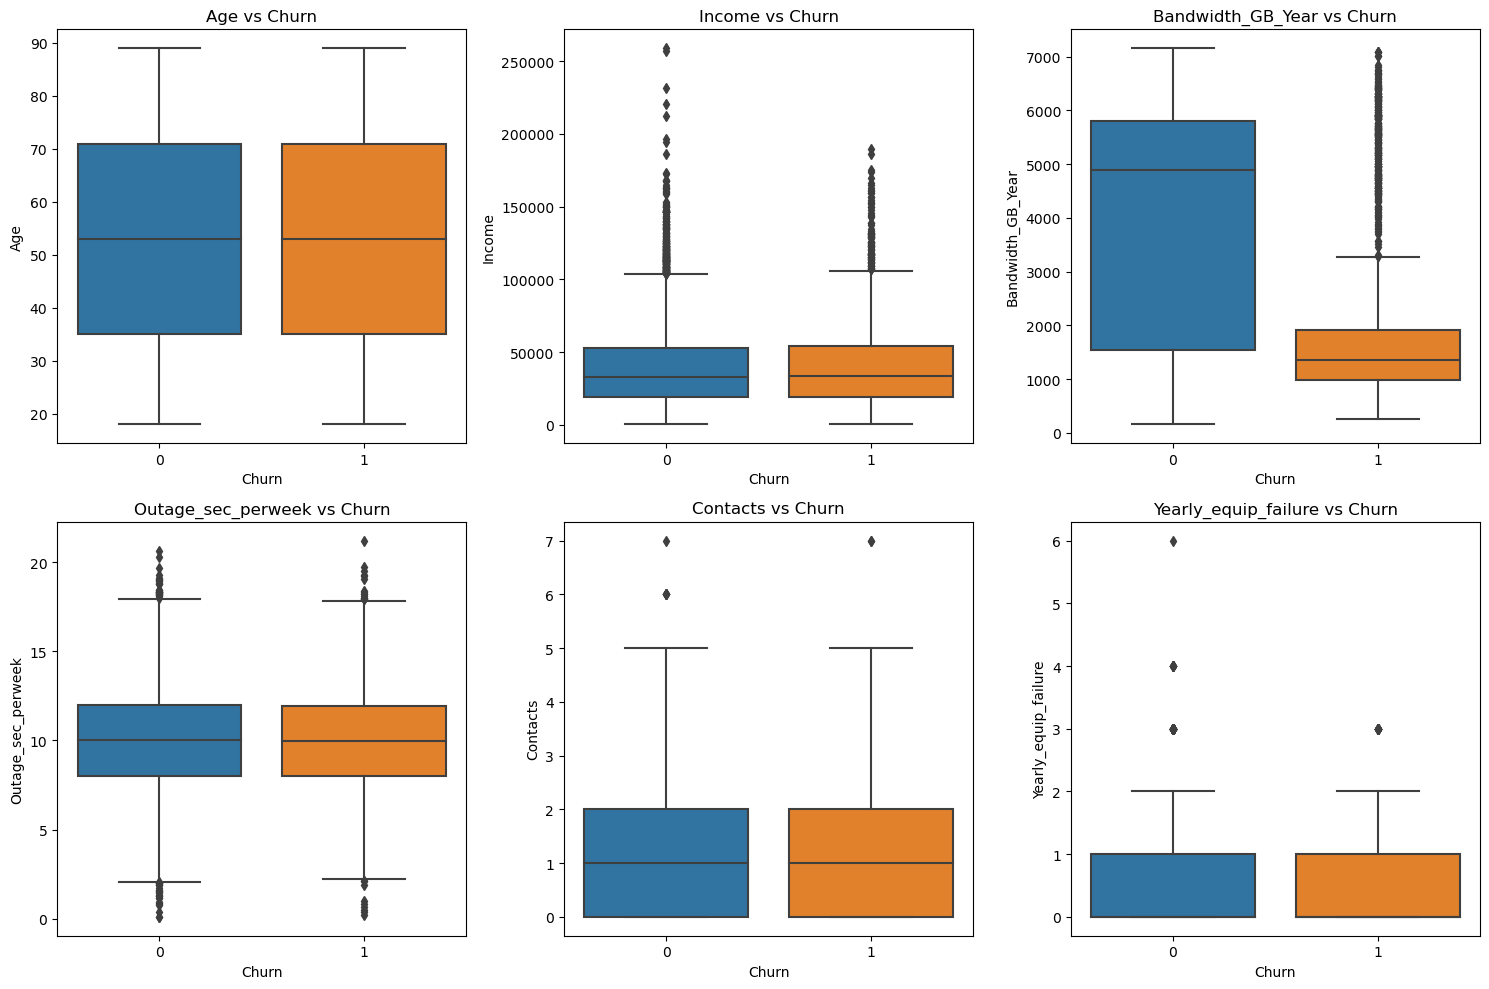

In [15]:
# bivariate visualizations - box plots for continuous variables vs Churn
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Churn', y=var, data=df)
    plt.title(f'{var} vs Churn')
plt.tight_layout()
plt.show()

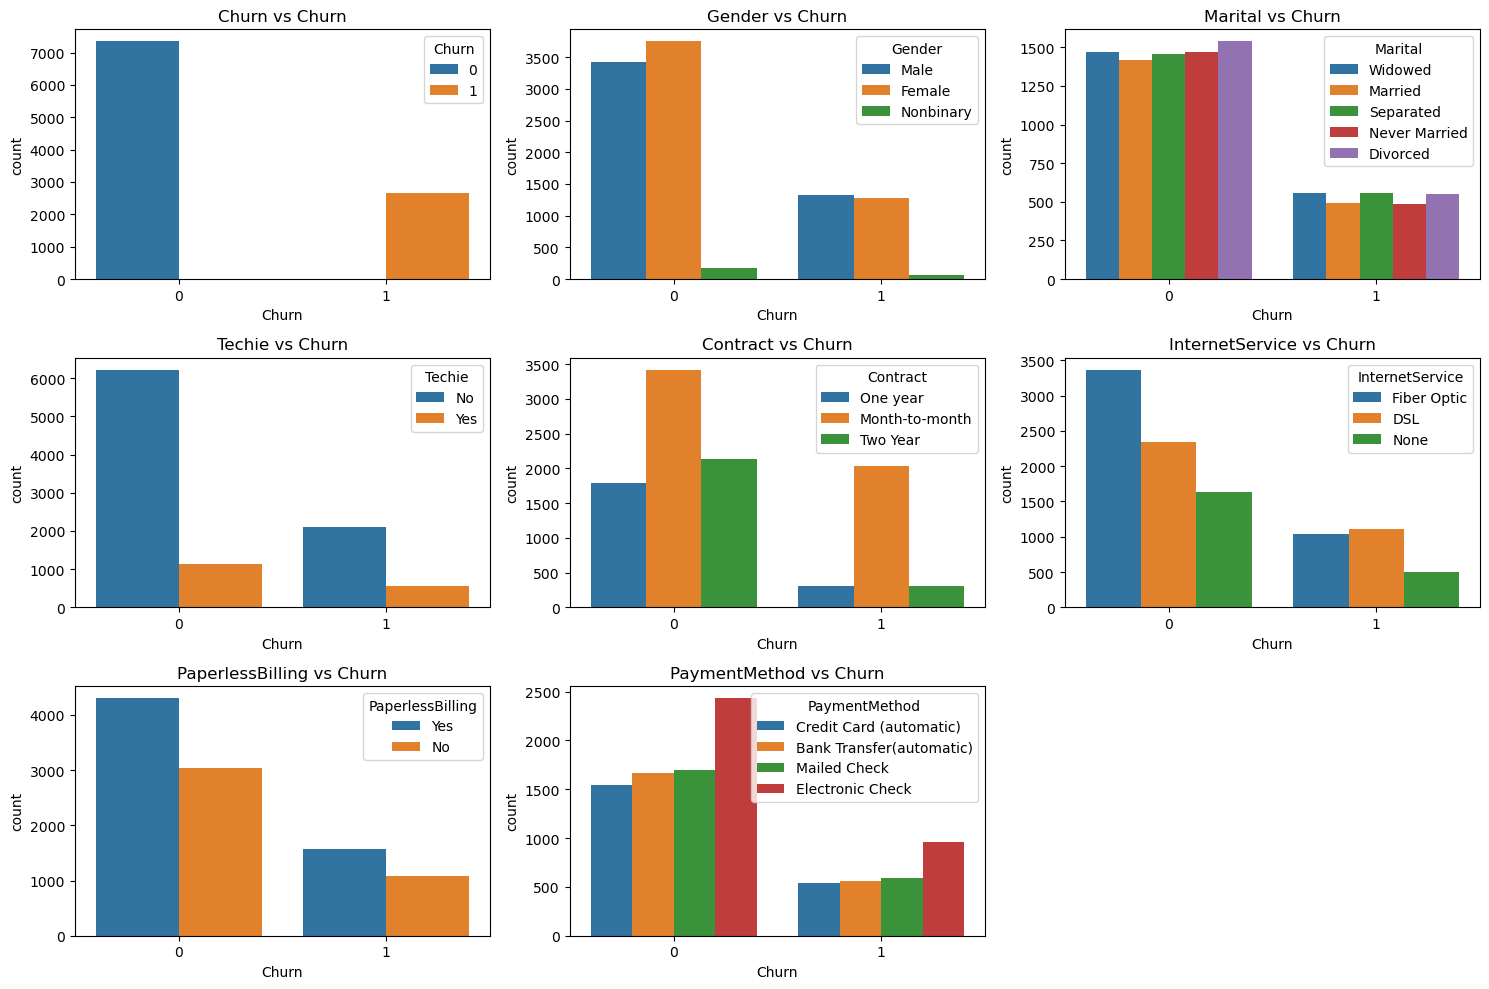

In [16]:
# bivariate visualizations - bar plots for categorical variables vs Churn
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x='Churn', hue=var, data=df)
    plt.title(f'{var} vs Churn')
plt.tight_layout()
plt.show()

In [17]:
# save prepared data to csv
df_encoded.to_csv('prepared_data_d208_task2.csv', index=False)

In [18]:
# define dependent variable
y = df_encoded['Churn']

# define the relevant independent variables from C2
X = df_encoded.drop(columns=['Churn'])

# add a constant to the model (intercept)
X = sm.add_constant(X)

# fit the initial logistic regression model
initial_model = sm.Logit(y, X).fit()

# display initial model summary
print(initial_model.summary())

Optimization terminated successfully.
         Current function value: 0.406281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                  0.2974
Time:                        23:58:38   Log-Likelihood:                -4062.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.6185      

In [19]:
# perform backward elimination for a more iterative approach
def backward_elimination(X, y, significance_level=0.05):
    while True:
        # fit the model
        model = sm.Logit(y, X).fit()
        
        # get p-values
        p_values = model.pvalues
        
        # get max p-value
        max_p_value = p_values.max()
        
        # check if the max p-value is greater than 0.05
        if max_p_value > significance_level:
            # get variable with the max p-value
            excluded_var = p_values.idxmax()
            
            # drop variable with the max p-value
            X = X.drop(columns=[excluded_var])
        else:
            break
    
    return model

# apply backward elimination
reduced_model = backward_elimination(X, y)

# display reduced model summary
print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.406281
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406284
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406296
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406306
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406341
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406546
  

In [20]:
# define the dependent variable
y = df_encoded['Churn']

# ensure X includes only the columns used in the reduced model
# extract the columns from the reduced model summary
reduced_columns = [
    'const', 'Bandwidth_GB_Year', 'Gender_Male', 'Marital_Separated', 
    'Marital_Widowed', 'Techie_Yes', 'Contract_One year', 
    'Contract_Two Year', 'InternetService_Fiber Optic', 
    'InternetService_None', 'PaymentMethod_Electronic Check'
]

# add a constant to X and ensure it has the same columns as the reduced model
X_reduced = sm.add_constant(df_encoded[[
    'Bandwidth_GB_Year', 'Gender_Male', 'Marital_Separated', 
    'Marital_Widowed', 'Techie_Yes', 'Contract_One year', 
    'Contract_Two Year', 'InternetService_Fiber Optic', 
    'InternetService_None', 'PaymentMethod_Electronic Check'
]])

# ensure 'const' is the first column in X_reduced
if 'const' not in X_reduced.columns:
    X_reduced.insert(0, 'const', 1)

# fit the reduced logistic regression model
reduced_model = sm.Logit(y, X_reduced).fit()

# predict probabilities using the reduced model
y_pred_prob = reduced_model.predict(X_reduced)

# convert probabilities to binary predictions (using 0.5 as the threshold)
y_pred = (y_pred_prob >= 0.5).astype(int)

# calculate the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Optimization terminated successfully.
         Current function value: 0.406726
         Iterations 7
Confusion Matrix:
[[6528  822]
 [1080 1570]]


In [21]:
# calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8098
